# DAMA Day Workshop

## Welcome to this DAMA Day Workshop!
If you have any questions about this notebook, please contact us:
Victoria Da Poian (victoria.dapoian@nasa.gov)
Eric Lyness (eric.i.lyness@nasa.gov)

### In this notebook:
- Processing the Data
- Exploring the Data 
- Putting data in a ML format


Data = Csv file with :
- 1 column for USID (identification of the spectrum)
- 1950 columns of mass spectra (raw science data)
- 7 columns for params (parameters linked to the instrument and measurement)
- 2 columns for labels (6 different categories, 64 samples)

# Processing and Exploring the Data

We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [2]:
import pandas as pd
import os
import numpy as np
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
def encoder(dataToEncode): #encode label values (label1 label2) as integer values
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    classes = encoder.classes_
    # convert the vector of integers to dummy variables (i.e. one hot encoded) 
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = encoded_Y.reshape(len(encoded_Y), 1)
    Y = onehot_encoder.fit_transform(integer_encoded)
    return(Y)

def printEncodertoLabels(dataToEncode, nb_categories): # print the relations between the class values and the encoded integers
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    for i in range(nb_categories):
        print(str(i) + " : " + encoder.inverse_transform([i]))
        
def dicEncodertoLabels(dataToEncode, nb_categories): # create a dictionary between the real labels and the encoded integers values
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    arraytoLabelDico = {}
    for k in range(nb_categories):
        encoded_array = np.zeros(nb_categories)
        encoded_array[k] = 1
        inverted_label = encoder.inverse_transform([argmax(encoded_array)])
        arraytoLabelDico[tuple(encoded_array)] = str(inverted_label)
    return(arraytoLabelDico)
 
    
def operationNormalizeX(x): #normalization process for our input data
    return(x/(1+x))

In [7]:
###Load INPUT data File
file = 'ml_data_damaday_final_VDP.csv'
filename = file.split(".csv")[0]
dataset = pd.read_csv(file)  

In [8]:
###Info about input data File 
print(dataset.head())
print(dataset.shape)

# print(dataset.info())
# print(dataset.describe())
# print(dataset.dtypes())

         USID  0  1  2  3  4  5  6  7  8  ...  1950   Param1  Param2  \
0  8198000001  0  0  0  0  0  0  0  0  0  ...     0  12.6549       5   
1  8198000002  0  0  0  0  0  0  0  0  0  ...     0  12.2765       5   
2  8198000003  0  0  0  0  0  0  0  0  0  ...     0  12.7667       5   
3  8198000004  0  0  0  0  0  0  0  0  0  ...     0  12.4442       5   
4  8198000005  0  0  0  0  0  0  0  0  0  ...     0  13.1107       5   

     Param3  Param4  Param5  Param6  Param7  Label1  Label2  
0  0.463842       1    3812      83    0.01       A      10  
1  0.644139       1    2891      99    0.01       A      10  
2  0.417654       1    2720     102    0.01       A      10  
3  0.712478       1    1961      86    0.01       A      10  
4  0.566622       1    2652      98    0.01       A      10  

[5 rows x 1961 columns]
(26685, 1961)


### Analysis of the Columns (USID, Mass Spec, Params, Labels)

In [9]:
###Columns names
columns_names = dataset.columns.tolist()
listAllParams = columns_names[-9:-2]
print(listAllParams)
nberParams = len(listAllParams)

###Just the params part
dataset_params = dataset[listAllParams]
print(dataset_params)

['Param1', 'Param2', 'Param3', 'Param4', 'Param5', 'Param6', 'Param7']
          Param1  Param2    Param3  Param4  Param5  Param6     Param7
0      12.654900       5  0.463842       1    3812      83   0.010000
1      12.276500       5  0.644139       1    2891      99   0.010000
2      12.766700       5  0.417654       1    2720     102   0.010000
3      12.444200       5  0.712478       1    1961      86   0.010000
4      13.110700       5  0.566622       1    2652      98   0.010000
5      12.328100       5  0.979381       1    2013     133   0.010000
6      12.986000       5  0.576585       1    2085     110   0.010000
7      13.020400       5  0.603166       1    1737      89   0.010000
8      12.981700       5  0.295232       1    1301      58   0.010000
9      13.029000       5  0.700253       1    1177      67   0.010000
10     15.084400       5  0.309660       1    4127     106   0.010000
11     15.140300       5  0.255985       1    4360      94   0.010000
12     14.749000   

In [12]:
###Here you select the params you want to remove 
listParams = [] #no params to remove
#listParams = ["Param1", "Param2"] #if you want to remove Param1 and Param2

In [13]:
###Y values (2 options for the labels)
y_1 = dataset.Label1
y_2 = dataset.Label2

###Define X values (all the dataset, only mass spec data, mass spec data + params)
Xall = dataset.drop(['Label1','Label2'],axis=1) #all data
XnoUSID = Xall.drop(['USID'],axis=1) #all data without USID
XmassSpec = XnoUSID.drop(listAllParams, axis=1) #just mass spec data
XmassSpec.shape

(26685, 1951)

### Define your inputs X and Y

In [20]:
#Which input data X do you want to use?
X = XnoUSID.drop([param for param in listParams], axis=1)
inputSize = X.shape[1]

#Which label y do you want to use?
y=y_1
nb_categories = len(pd.unique(y))
print(nb_categories)

print(X[:10])

6
   0  1  2  3  4  5  6  7  8  9  ...  1948  1949  1950   Param1  Param2  \
0  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.6549       5   
1  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.2765       5   
2  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.7667       5   
3  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.4442       5   
4  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.1107       5   
5  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.3281       5   
6  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9860       5   
7  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0204       5   
8  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9817       5   
9  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0290       5   

     Param3  Param4  Param5  Param6  Param7  
0  0.463842       1    3812      83    0.01  
1  0.644139       1    2891      99    0.01  
2  0.417654       1    2720     10

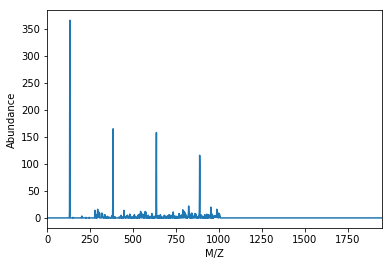

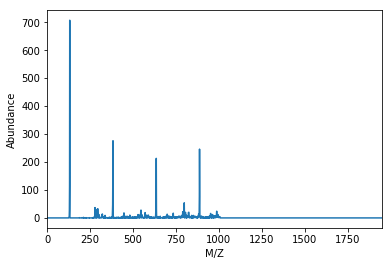

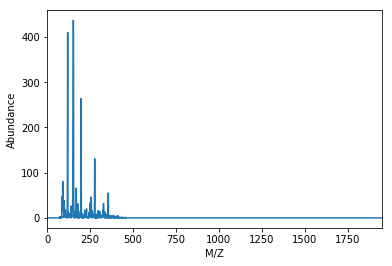

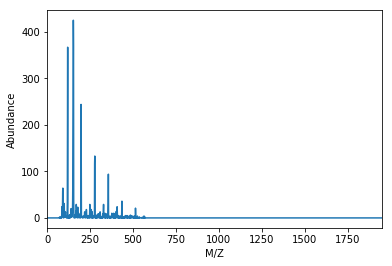

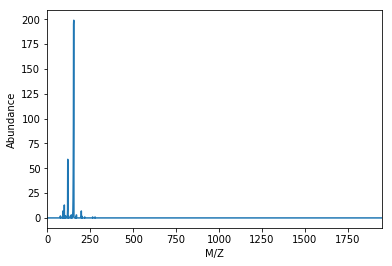

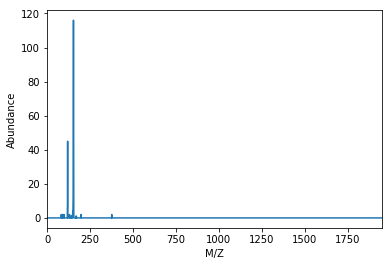

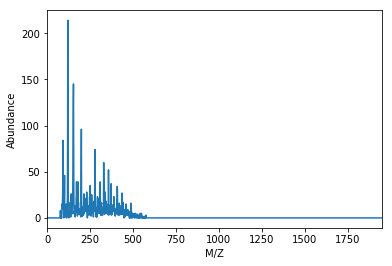

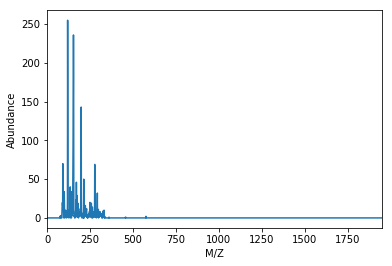

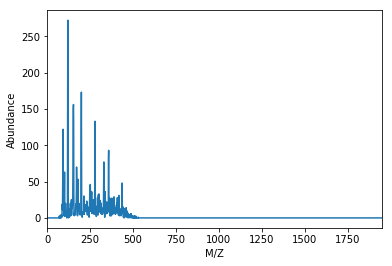

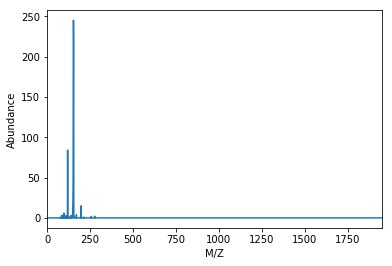

In [21]:
## Plot some mass specs
for i in range(1,100,10):
    massSpec = XmassSpec.iloc[i]
    #print(massSpec)
    ax=massSpec.plot()
    ax.set_ylabel('Abundance')
    ax.set_xlabel('M/Z')
    plt.show()

### Encode the labels as integers

In [25]:
###Encode class values as integers
Y = encoder(y)
printEncodertoLabels(y, nb_categories)
arraytoLabelDico = dicEncodertoLabels(y, nb_categories)
print(arraytoLabelDico)
print("\nX: {} ; X(noUSID): {} ; y (initial): {} ; y(encoded): {} ".format(X.shape, XnoUSID.shape, y.shape, Y.shape))
print("\nList of the different {} labels:\n {}  ".format(nb_categories, pd.unique(y)))

['0 : A']
['1 : B']
['2 : C']
['3 : D']
['4 : E']
['5 : F']
{(1.0, 0.0, 0.0, 0.0, 0.0, 0.0): "['A']", (0.0, 1.0, 0.0, 0.0, 0.0, 0.0): "['B']", (0.0, 0.0, 1.0, 0.0, 0.0, 0.0): "['C']", (0.0, 0.0, 0.0, 1.0, 0.0, 0.0): "['D']", (0.0, 0.0, 0.0, 0.0, 1.0, 0.0): "['E']", (0.0, 0.0, 0.0, 0.0, 0.0, 1.0): "['F']"}

X: (26685, 1958) ; X(noUSID): (26685, 1958) ; y (initial): (26685,) ; y(encoded): (26685, 6) 

List of the different 6 labels:
 ['A' 'B' 'C' 'D' 'E' 'F']  


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Normalization Process

In [143]:
###Normalization process

# ###Min - Max scaler
# min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# X_scale = min_max_scaler.fit_transform(X)
# X_norm = pd.DataFrame(min_max_scaler.transform(X), index=X.index, columns=X.columns)

X = X.select_dtypes(exclude=['object']).apply(operationNormalizeX,axis=0)
print(X[:10])


     0    1    2    3    4    5    6    7    8    9  ...  1948  1949  1950  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

     Param1    Param2    Param3  Param4    Param5    Param6    Param7  
0  0.926766  0.833333  0.316866     0.5  0.999738  0.988095  0.009901

Now, we split the dataset into training, testing and validation sets.

In [132]:
###Split dataset
train_test_ratio = 0.2 #80% is used for the training
test_val_ratio = 0.5 #Half for validation, half for testing

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=train_test_ratio)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=test_val_ratio)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(21348, 1958) (2668, 1958) (2669, 1958) (21348, 6) (2668, 6) (2669, 6)
